# Explore here

In [2]:
import pandas as pd
import seaborn as sns

df_sales = pd.read_csv ("J:\SerTempAlt\sales.csv", parse_dates=['date'], index_col='date')


# Asegúrate de que los datos están ordenados por fecha
df_sales = df_sales.sort_index()
df_sales

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


In [3]:
# Convertir el índice a solo la fecha
df_sales.index = df_sales.index.date
df_sales

,sales
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415
2023-09-02,997.350214


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_sales, period = 30)
decomposition

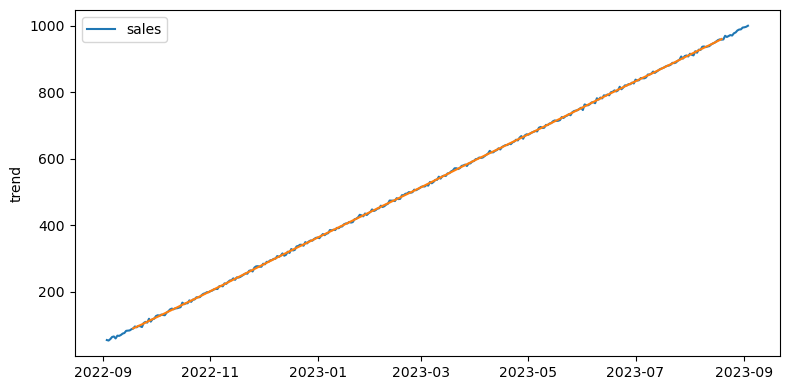

In [5]:
import matplotlib.pyplot as plt

trend = decomposition.trend

# Visualiza los datos
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = df_sales)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

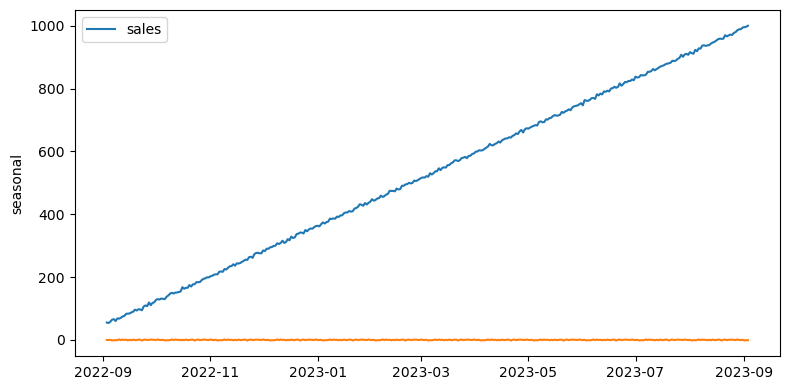

In [6]:
"""#### Análisis de la estacionalidad

Para acceder a su información recurrimos al componente `seasonal` del resultado `decomposition`."""

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = df_sales)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

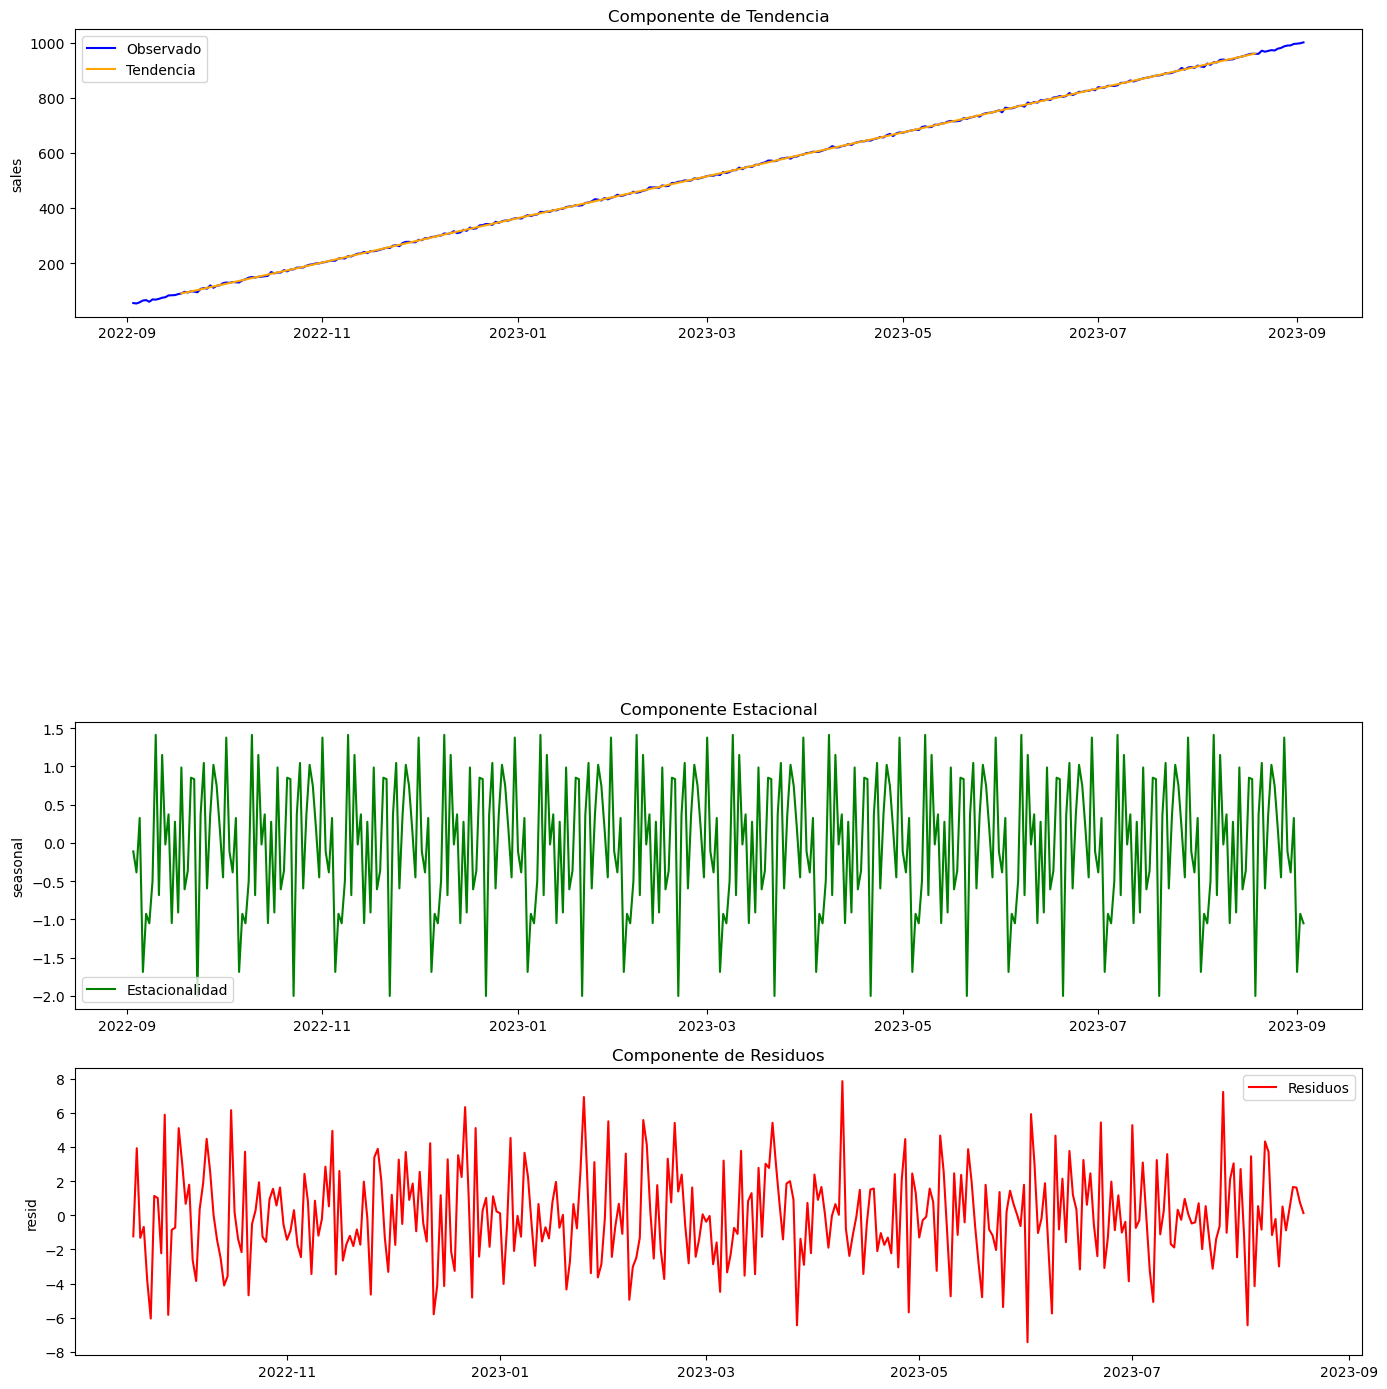

In [7]:
#Utilizamos la función seasonal_decompose de la biblioteca statsmodels para descomponer la serie de tiempo en sus componentes de tendencia, estacionalidad y residuo

from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Descomposición de la serie de tiempo
result = seasonal_decompose(df_sales['sales'], model='additive', period=30)  # Asumiendo una estacionalidad mensual (30 días)

# Extrae los componentes
observed = result.observed
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Visualización de los componentes

# Configura el tamaño de las figuras
plt.figure(figsize=(14, 14))

# Observado
plt.subplot(411)
sns.lineplot(data=observed, label='Observado', color='blue')
plt.legend(loc='best')
plt.title('Componente Observado')

# Tendencia
plt.subplot(411)
sns.lineplot(data=trend, label='Tendencia', color='orange')
plt.legend(loc='best')
plt.title('Componente de Tendencia')

# Estacionalidad
plt.subplot(413)
sns.lineplot(data=seasonal, label='Estacionalidad', color='green')
plt.legend(loc='best')
plt.title('Componente Estacional')

# Residuos
plt.subplot(414)
sns.lineplot(data=residual, label='Residuos', color='red')
plt.legend(loc='best')
plt.title('Componente de Residuos')

plt.tight_layout()
plt.show()

Para evaluar la estacionalidad de la serie temporal podemos aplicar la llamada Prueba de Dickey-Fuller (Dickey-Fuller test), que es un contraste de hipótesis en el que la hipótesis nula es que la serie es estacionaria, y la alternativa, que es no estacionaria:

In [8]:
from statsmodels.tsa.stattools import adfuller



# Aplica la prueba de Dickey-Fuller
result_ADF = adfuller(df_sales['sales'])

# Extrae los resultados
adf_statistic = result_ADF[0]
p_value = result_ADF[1]
used_lag = result_ADF[2]
n_obs = result_ADF[3]
critical_values = result_ADF[4]
ic_best = result_ADF[5]

# Muestra los resultados
print(f'Estadístico ADF: {adf_statistic}')
print(f'Valor p: {p_value}')
print(f'Número de retardos utilizados: {used_lag}')
print(f'Número de observaciones utilizadas para la prueba ADF: {n_obs}')
print('Valores críticos:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')


# Interpreta los resultados
if p_value < 0.05:
    print("La serie es estacionaria (rechazamos la hipótesis nula).")
else:
    print("El Valor de 'p', es mayor a 0.5, por eso la serie no es estacionaria (no podemos rechazar la hipótesis nula).")

Estadístico ADF: 0.5454141937063847
Valor p: 0.9861899815311066
Número de retardos utilizados: 13
Número de observaciones utilizadas para la prueba ADF: 352
Valores críticos:
   1%: -3.4490648539347544
   5%: -2.8697861692116478
   10%: -2.5711631253228306
El Valor de 'p', es mayor a 0.5, por eso la serie no es estacionaria (no podemos rechazar la hipótesis nula).


In [9]:
# miramos con "otra lupa"
# Diferenciar la serie para remover tendencia


sales_dif = df_sales #['sales']
# Diferenciar la serie para remover tendencia
sales_dif['diff_sales'] = sales_dif['sales'].diff().dropna()

ts_sales_dif = sales_dif["diff_sales"]
ts_sales_dif.dropna(inplace = True)

ts_sales_dif

2022-09-04   -1.488946
2022-09-05    4.338482
2022-09-06    6.389205
2022-09-07    1.482734
2022-09-08   -5.931768
                ...   
2023-08-30    0.518681
2023-08-31    5.386972
2023-09-01    0.827090
2023-09-02    1.535798
2023-09-03    3.132571
Name: diff_sales, Length: 365, dtype: float64

In [10]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [11]:
# Test de Dickey-Fuller en la serie diferenciada
test_stationarity(ts_sales_dif)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

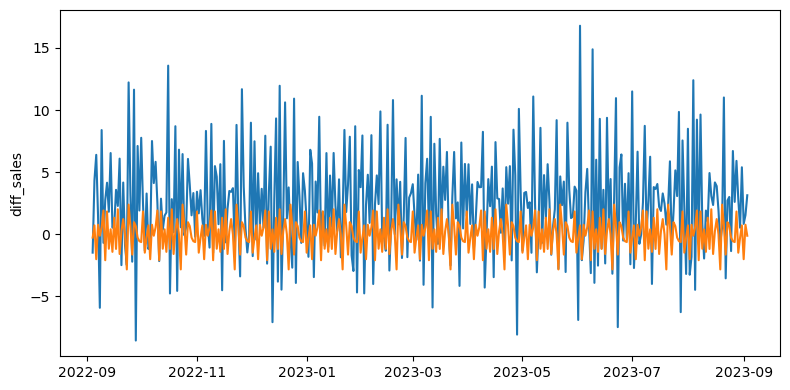

In [12]:
sales_dif_decomposition = seasonal_decompose(ts_sales_dif, period = 30)

sales_dif_seasonal = sales_dif_decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_sales_dif)
sns.lineplot(data = sales_dif_seasonal)

plt.tight_layout()

plt.show()

	Serie Diferenciada: Muestra las diferencias diarias en las ventas, ayudando a estabilizar la serie y eliminar tendencias a largo plazo.
	Componente Estacional: Muestra los patrones cíclicos y repetitivos que ocurren cada 30 días.


Usaremos las funciones plot_acf y plot_pacf de statsmodels para crear los gráficos de autocorrelación y autocorrelación parcial.

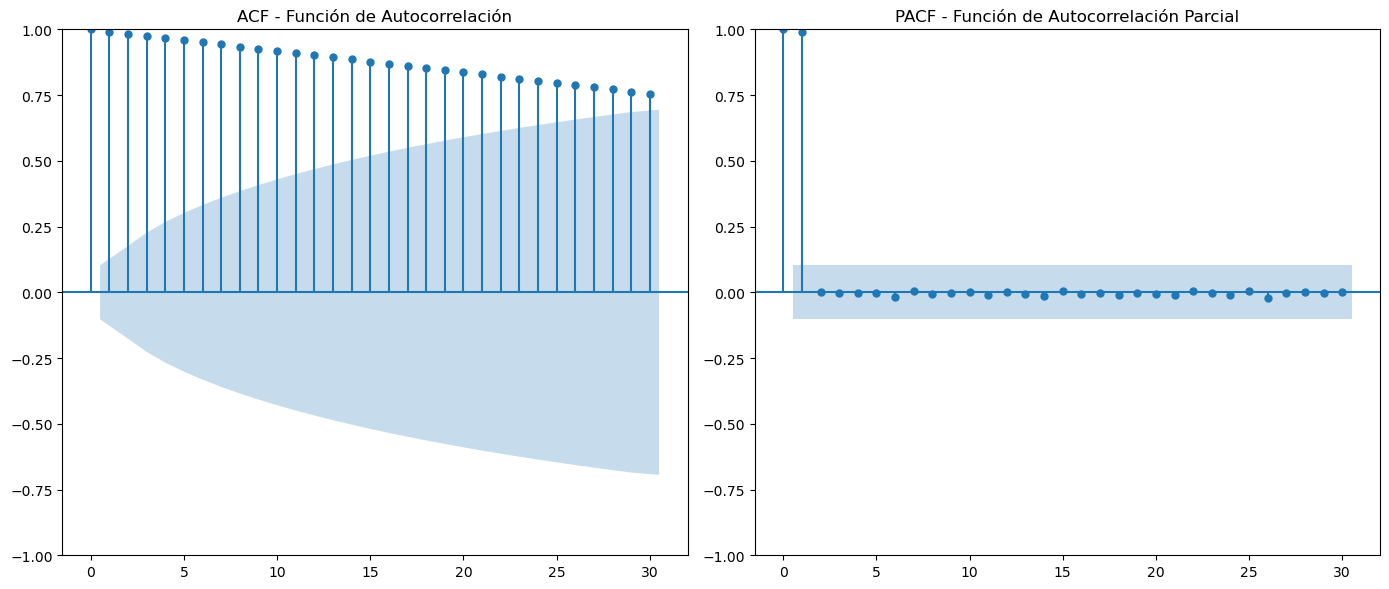

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Análisis de la autocorrelación
plt.figure(figsize=(14, 6))

# Gráfico ACF (Autocorrelation Function)
plt.subplot(121)
plot_acf(df_sales['sales'], lags=30, ax=plt.gca(), title="ACF - Función de Autocorrelación")

# Gráfico PACF (Partial Autocorrelation Function)
plt.subplot(122)
plot_pacf(df_sales['sales'], lags=30, ax=plt.gca(), title="PACF - Función de Autocorrelación Parcial")

plt.tight_layout()
plt.show()

Gráfico de Autocorrelación (ACF)

	•	ACF (Autocorrelation Function): Muestra la correlación de la serie con sus propios valores en diferentes retardos (lags). Por ejemplo, el lag 1 muestra la correlación entre el valor en el tiempo t y el valor en el tiempo t-1.

Gráfico de Autocorrelación Parcial (PACF)

	•	PACF (Partial Autocorrelation Function): Muestra la correlación entre la serie y sus retardos, eliminando el efecto de los retardos intermedios. Es útil para identificar la orden del componente autorregresivo (AR) en un modelo ARIMA.

c:\Users\triba\anaconda3\envs\top\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\triba\anaconda3\envs\top\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\triba\anaconda3\envs\top\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


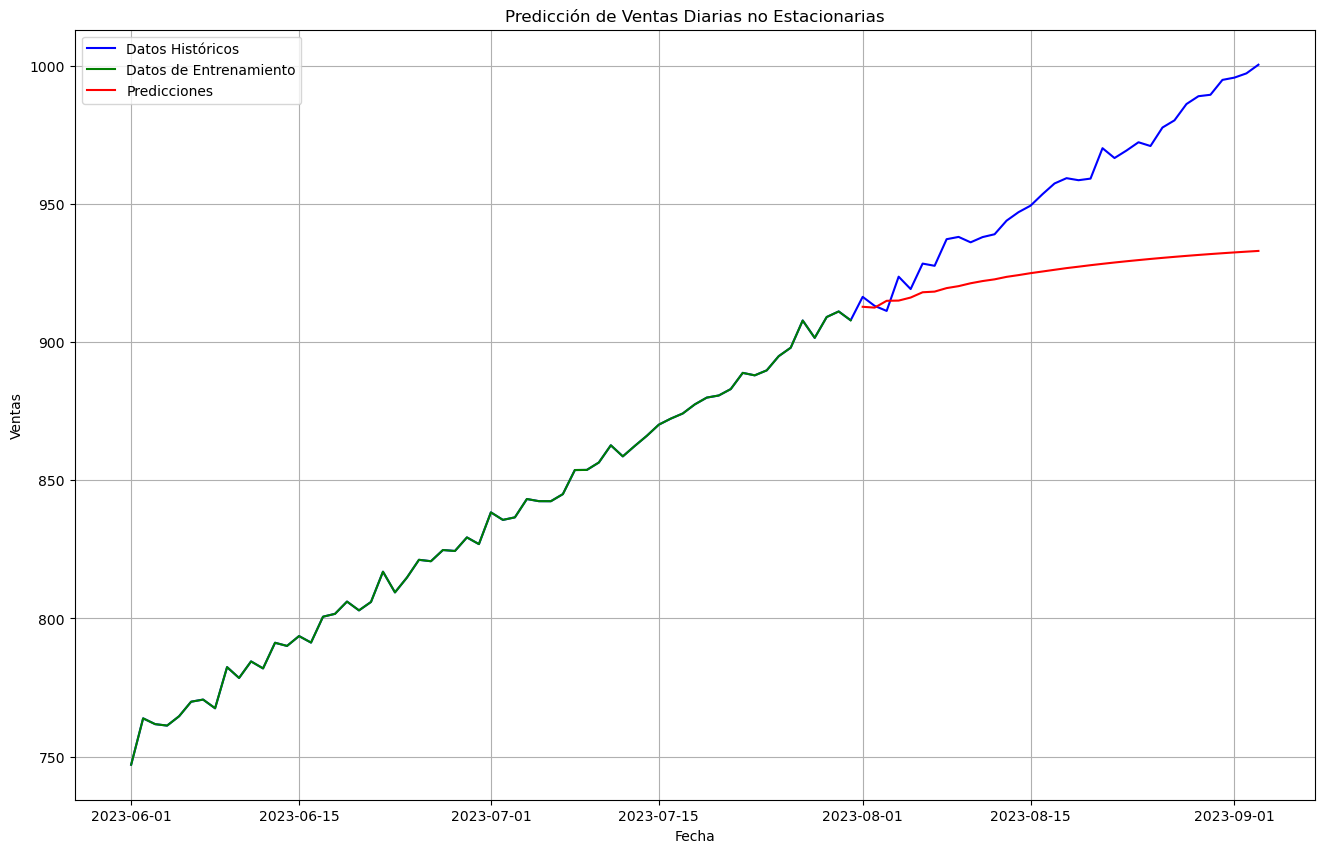

Error Cuadrático Medio: 1389.8896725714058


In [14]:
#Entrenamos Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Modelado ARIMA sin estacionalidad si la serie no es estacionaria
if result_ADF[1] >= 0.05:
    deseasonalized_data = df_sales['sales'] - seasonal

  
# Parámetro de margen de tiempo
start_date = "2023-06"
end_date = "2023-10"

# Convertir las fechas de inicio y fin a datetime.date
start_date = pd.to_datetime(start_date).date()
end_date = pd.to_datetime(end_date).date()

# Dividir los datos en entrenamiento y prueba
train_data = df_sales.loc[df_sales.index < pd.to_datetime('2023-08-01').date(), 'sales']
test_data = df_sales.loc[df_sales.index >= pd.to_datetime('2023-08-01').date(), 'sales']

# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Predicción
forecast = model_fit.forecast(steps=len(test_data))
forecast.index = test_data.index

# Filtrar los datos históricos
filtered_sales = df_sales.loc[(df_sales.index >= start_date) & (df_sales.index <= end_date)]

# Filtrar las predicciones
filtered_forecast = forecast.loc[(forecast.index >= start_date) & (forecast.index <= end_date)]

# Filtrar los datos de entrenamiento
filtered_train_data = train_data.loc[(train_data.index >= start_date) & (train_data.index <= end_date)]

# Visualizar las predicciones junto con los datos históricos y los datos de entrenamiento
plt.figure(figsize=(16, 10))

# Datos históricos
sns.lineplot(x=filtered_sales.index, y=filtered_sales['sales'], label='Datos Históricos', color='blue')

# Datos de entrenamiento
sns.lineplot(x=filtered_train_data.index, y=filtered_train_data, label='Datos de Entrenamiento', color='green')

# Predicciones
sns.lineplot(x=filtered_forecast.index, y=filtered_forecast, label='Predicciones', color='red')

plt.title('Predicción de Ventas Diarias no Estacionarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

# Calcula el MSE
mse = mean_squared_error(test_data, forecast)
print(f'Error Cuadrático Medio: {mse}')

Un MSE (Mean Squared Error) de 1389.889 indica que, en promedio, los errores cuadráticos entre los valores observados y los valores predichos por el modelo son bastante grandes.

Lo único que tenemos que considerar es que para optimizar al máximo sus resultados, debemos transformar la serie en estacionaria, y como en el caso de esta serie no lo es, debemos transformarla usando la funcion auto_arima

In [20]:
import auto_arima

# Transformar la serie en estacionaria
ts_stationary = df_sales['sales'].diff().dropna()

# Función para probar la estacionaridad
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'Estadístico ADF: {result[0]}')
    print(f'Valor p: {result[1]}')
    print(f'Número de retardos utilizados: {result[2]}')
    print(f'Número de observaciones utilizadas para la prueba ADF: {result[3]}')
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] < 0.05:
        print("La serie es estacionaria (rechazamos la hipótesis nula).")
    else:
        print("La serie no es estacionaria (no podemos rechazar la hipótesis nula).")

# Probar la estacionaridad de la serie transformada
test_stationarity(ts_stationary)

ModuleNotFoundError: No module named 'auto_arima'

El valor de p  es 5.212954111416503 \times 10^{-16}, lo que en notación científica indica un número extremadamente pequeño. Para interpretarlo mejor, puedes expresarlo de la siguiente manera:

 p \approx 0.0000000000000005212954111416503 

Este valor es prácticamente cero, y en el contexto estadístico, un valor de p tan pequeño usualmente indica que el resultado obtenido es extremadamente significativo. En pruebas de hipótesis, un valor de p pequeño (usualmente menos de 0.05 o 0.01) sugiere que se debe rechazar la hipótesis nula, pues es muy improbable que un resultado tan extremo ocurra por casualidad.

Ya que la serie la hemos transformado en estacionaria procedemos a ajustar el modelo usando auto_arima

In [16]:


# Ajustar el modelo ARIMA usando auto_arima
model = auto_arima(df_sales['sales'], seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Resumen del modelo ajustado
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.755 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
M

In [20]:

# Predicción
n_periods = 30  # número de días para predecir
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Crear un rango de fechas para las predicciones
last_date = df_sales.index[-1]
forecast_dates = [last_date + pd.DateOffset(days=i) for i in range(1, n_periods + 1)]

# Crear un DataFrame para las predicciones
predictions = pd.DataFrame(forecast, index=forecast_dates, columns=['Prediction'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_dates, columns=['Lower Bound', 'Upper Bound'])
predictions



,Prediction
2023-09-04,1002.158148
2023-09-05,1004.831668
2023-09-06,1007.423289
2023-09-07,1010.021630
2023-09-08,1012.619419
2023-09-09,1015.217254
2023-09-10,1017.815084
2023-09-11,1020.412915
2023-09-12,1023.010746
2023-09-13,1025.608577


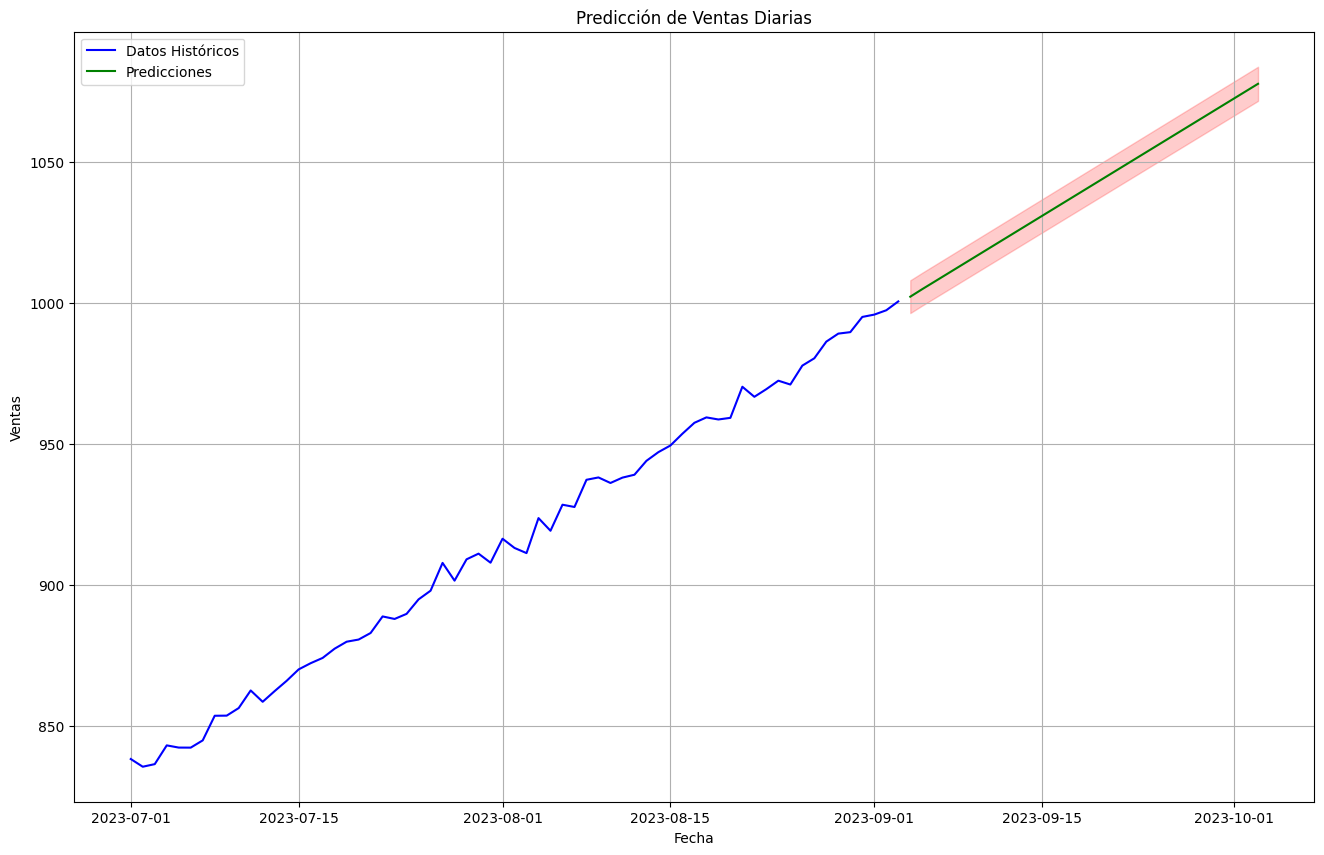

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los márgenes de tiempo
start_date = "2023-07"
end_date = "2023-11"

# Asegúrate de que las columnas de índice sean de tipo datetime
df_sales.index = pd.to_datetime(df_sales.index)
predictions.index = pd.to_datetime(predictions.index)
conf_int_df.index = pd.to_datetime(conf_int_df.index)

# Filtrar los datos históricos por fecha, así generar el grafico solo en este periodo para entenderlo mejor
filtered_sales = df_sales.loc[(df_sales.index >= start_date) & (df_sales.index <= end_date)]

# Filtrar las predicciones
filtered_predictions = predictions.loc[(predictions.index >= start_date) & (predictions.index <= end_date)]

# Filtrar los intervalos de confianza
filtered_conf_int = conf_int_df.loc[(conf_int_df.index >= start_date) & (conf_int_df.index <= end_date)]

# Visualizar las predicciones junto con los datos históricos
plt.figure(figsize=(16, 10))

# Datos históricos
sns.lineplot(x=filtered_sales.index, y=filtered_sales['sales'], label='Datos Históricos', color='blue')

# Predicciones
sns.lineplot(x=filtered_predictions.index, y=filtered_predictions['Prediction'], label='Predicciones', color='green')

# Intervalos de confianza
plt.fill_between(filtered_conf_int.index, filtered_conf_int['Lower Bound'], filtered_conf_int['Upper Bound'], color='red', alpha=0.2)

plt.title('Predicción de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import joblib

# Guardamos el modelo
joblib.dump(model, 'arima_model.pkl')


['arima_model.pkl']